# ** DESAFIO CLASIFICACION **

## MATERIA: Aprendizaje automático 1  / ISSD / Tecnicatura Ciencia de Datos e Inteligencia Artificial

## PROFESORA: Ing. Ana Diedrichs

## ALUMNO: Marcos Gallo

## TEMA ELEGIDO: "Red Wine Quality"

## FUENTE: UC Irvine Machine Learning Repository

#### PRESENTACIÓN DEL DATASET:

Se eligió el dataset "Wine Quality" que forma parte de la biblioteca del UCI Machine Learning Repository. En el se incluyen dos conjuntos de datos relacionados con muestras de "vinho verde" tinto y blanco del norte de Portugal. El objetivo es modelar la calidad del vino basándose en pruebas fisicoquímicas.

Los dos conjuntos de datos están relacionados con las variantes roja y blanca del vino portugués "Vinho Verde". Debido a cuestiones de privacidad y logística, sólo están disponibles las variables fisicoquímicas (entradas) y sensoriales (salida), por ejemplo, no hay datos sobre tipos de uva, marca de vino, precio de venta del vino, etc.

EL dataset de red wine quality, que será el que analizaré, esta compuesto por:
- Número de Filas: 1599
- Número de Columnas: 12
- Columnas del Conjunto de Datos:

   - fixed_acidity: Acidez fija (en g/dm³).
   - volatile_acidity: Acidez volátil (en g/dm³).
   - citric_acid: Ácido cítrico (en g/dm³).
   - residual_sugar: Azúcar residual (en g/dm³).
   - chlorides: Cloruros (en g/dm³).
   - free_sulfur_dioxide: Dióxido de azufre libre (en mg/dm³).
   - total_sulfur_dioxide: Dióxido de azufre total (en mg/dm³).
   - density: Densidad (en g/mc³).
   - pH: pH del vino.
   - sulphates: Sulfatos (en g/dm³).
   - alcohol: Contenido de alcohol (en % vol).
   - quality: Calidad del vino (Variable de salida).

#### PREPROCESAMIENTO

Antes de entrenar modelos de clasificación con este tipo de datos sobre calidad de vino, es importante realizar ciertos pasos de preprocesamiento para asegurar que los datos estén en un formato adecuado.

Primero se procede a leer el archivo csv con la función de pandas "read_csv" (Aclaro que aquí surgió un pequeño problema de lectura ya que no había especificado en un principio el delimitador del archivo csv, que por defecto viene especificado con "," y en este caso era ";"). Luego lo trasformo a un dataframe y ejecuto los metodos .info(), .head() y describe() para tener una noción del contenido y formato del mismo.

A través de la matriz de correlación verifico que tan relacionadas están las caraterísticas entre sí.
También verifico con el método .isnull() si existen valores nulos, no es así.


Importo las librerías necesarias para el análisis

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



In [8]:
# Parte de la configuración de las librerías
warnings.filterwarnings('ignore') # Ignorar errores
pd.set_option('display.max_columns', None) # Para imprimir todas las columnas del dataframe
pd.set_option('display.max_colwidth', None) # Para imprimir todos los datos de una característica

In [9]:
!pip install gdown

# Paso 1: Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Paso 2: Descargar el archivo CSV usando gdown
import gdown
url = "https://drive.google.com/uc?id=1PnYKDQz2TKf6qje4BjlNoK014JCMeYq7"
output = "data.csv"  # Nombre del archivo local
gdown.download(url, output, quiet=False)

# Paso 3: Leer el archivo CSV descargado localmente
import pandas as pd
df = pd.read_csv(output, delimiter=';')

# Visualizar las primeras filas del archivo
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=1PnYKDQz2TKf6qje4BjlNoK014JCMeYq7
To: /content/data.csv
100%|██████████| 84.2k/84.2k [00:00<00:00, 41.1MB/s]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [12]:
# Traduzco y renombro las columnas para una mejor comprensión.
df.rename(columns = {"fixed acidity": "acides fija",
                       "volatile acidity": "acides volatil",
                       "citric acid": "acides citrica",
                       "residual sugar": "azucar residual",
                       "chlorides": "cloruros",
                       "free sulfur dioxide": "dioxido de azufre libre",
                       "total sulfur dioxide": "dioxido de azufre total",
                       "density": "densidad",
                       "pH": "pH",
                       "sulphates": "sulfatos",
                       "alcohol": "contenido de alcohol",
                       "quality": "Calidad del vino"},
            inplace = True)

In [13]:
df.columns

Index(['acides fija', 'acides volatil', 'acides citrica', 'azucar residual',
       'cloruros', 'dioxido de azufre libre', 'dioxido de azufre total',
       'densidad', 'pH', 'sulfatos', 'contenido de alcohol',
       'Calidad del vino'],
      dtype='object')

In [14]:

# Revisar datos nulos
df.isnull().sum()

,0
acides fija,0
acides volatil,0
acides citrica,0
azucar residual,0
cloruros,0
dioxido de azufre libre,0
dioxido de azufre total,0
densidad,0
pH,0
sulfatos,0


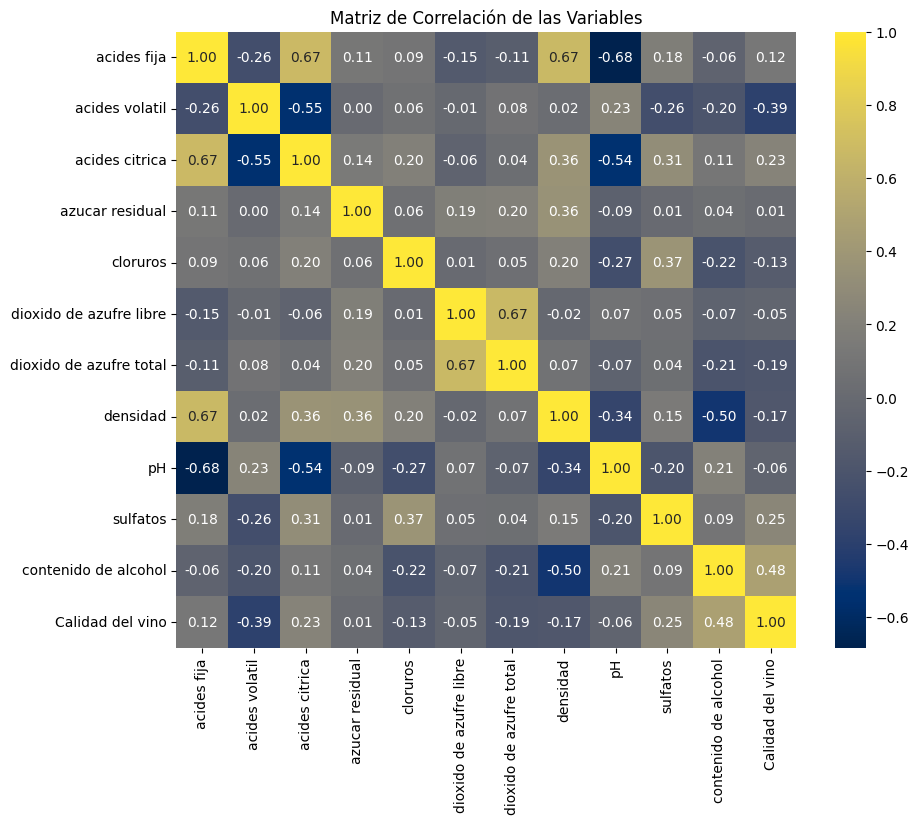

In [15]:
m_corr= df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(m_corr, annot=True, cmap='cividis', fmt=".2f")
plt.title("Matriz de Correlación de las Variables")
plt.show()

Se observa que las características que afectan más directamente a la "calidad del vino" son el "contenido de alcohol", la "acidés volátil" (de manera inversa), la "acides cítrica" y los "sulfatos".

In [16]:
# Verifico que valores únicos existen en las puntuaciones de calidad que recibe cada muestra.
df["Calidad del vino"].unique()

array([5, 6, 7, 4, 8, 3])

In [17]:
df["Calidad del vino"].value_counts()

,count
Calidad del vino,
5,681
6,638
7,199
4,53
8,18
3,10


Luego de este recuento de la cantidad de muestras que han sido puntuadas con cada una de las puntuaciones de calidad, puedo notar que el conjunto de datos esta desbalanceado en el sentido de que la mayoría de las muestras caen en notas intermedias y una baja cantidad son evaluadas con notas altas o bajas. A priori parecería ser necesario mas datos con notas bajas y altas para que al entrenar modelos de predicción se obtengan resultados eficientes y generales.



#### Selección de la variable objetivo

La variable a clasificar será la "Calidad del vino", en el dataframe esta definida por notas que van desde 3 a 8 puntos.

Quiero aclarar que primeramente dividí a la columna "calidad del vino", transformándola en tres categorías (baja, promedio y alta calidad). Pero al entrenar modelos y realizar las evaluaciones resultaba que ninguno de los modelos, aún ajustando parámetros, terminaba siendo aceptable para la predicción de la clase de baja calidad. Por esto probé un enfoque binario en la división de clases, aunque obviamente menos específico, que sirva para diferenciar una clase de alta calidad de otra de calidad promedio.

Por cuestiones prácticas, entonces, voy a definir una clasificación binaria entre dos categorías de vinos ("Alta Calidad" y "Calidad Promedio"), en este sentido crearé una nueva columna con la clasificación binaria definida de la siguiente manera: Asignaré 1 a las notas 6, 7 y 8 que corresponderán a la categoría "Alta Calidad" de vino; y asignaré 0 a las notas 3, 4 y 5 que corresponderán a la categoría "Calidad Promedio" de vino.

In [18]:
# Crear la columna binaria aplicando una función lambda con condiciones.

df['Calidad final vino'] = df['Calidad del vino'].apply(lambda x: 1 if x == 8 or x == 7 or x == 6 else 0)


In [19]:
# Separación de variables predictoras (X_temp, es decir, las características o "features" que se usarán para entrenar el modelo).
# Elimino "Calidad del vino" y "Calidad final vino" que son variables de resultado o etiquetas y no deberían incluirse entre las variables predictoras.

X_temp = df.drop(columns=['Calidad del vino', "Calidad final vino"], axis=1)
y = df["Calidad final vino"] # "y" representa la variable objetivo o target, que el modelo intentará predecir.

In [20]:
# escalado con el uso de MinMaxScaler asegura que todas las características tengan valores comparables.
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
acides fija,1599.0,0.329171,0.154079,0.0,0.221239,0.292035,0.407080,1.0
acides volatil,1599.0,0.279329,0.122644,0.0,0.184932,0.273973,0.356164,1.0
acides citrica,1599.0,0.270976,0.194801,0.0,0.090000,0.260000,0.420000,1.0
azucar residual,1599.0,0.112247,0.096570,0.0,0.068493,0.089041,0.116438,1.0
cloruros,1599.0,0.125988,0.078573,0.0,0.096828,0.111853,0.130217,1.0
dioxido de azufre libre,1599.0,0.209506,0.147326,0.0,0.084507,0.183099,0.281690,1.0
dioxido de azufre total,1599.0,0.142996,0.116238,0.0,0.056537,0.113074,0.197880,1.0
densidad,1599.0,0.490211,0.138571,0.0,0.406021,0.490455,0.570117,1.0
pH,1599.0,0.449695,0.121564,0.0,0.370079,0.448819,0.519685,1.0
sulfatos,1599.0,0.196496,0.101501,0.0,0.131737,0.173653,0.239521,1.0


Utilizo el MinMaxScaler para normalizar o escalar las características de X_temp en un rango de valores entre 0 y 1. Esto produce un nuevo DataFrame X en el cual cada columna (es decir, cada característica) tiene valores en ese rango.

Al normalizar las características en un rango común, se evita que variables de diferentes escalas influyan desproporcionadamente en el modelo.

#### Explicación del Objetivo

Para este análisis, el objetivo es predecir la calidad de un vino tinto portugués. Esto se hará en base a un conjunto de características químicas y físicas recolectadas de una serie de muestras de vinos, las mismas fueron además etiquetadas con una puntuación otorgada por enólogos acreditados. En base a esta información, se creó una clasificación binaria donde se etiquetan dos clases:

- "ALta calidad": Para puntuaciones de 6, 7 y 8 puntos.
- "Calidad promedio": Para puntuaciones de 3, 4,y 5 puntos.

Así, se espera lograr entrenar un modelo de clasificación que tenga un desempeño aceptable en la predicción de calidad del vino para futuras muestras nuevas.

#### Elección de Modelos de Clasificación

Se seleccionarán tres modelos para entrenar y comparar su rendimiento:

- Regresión Logística:

Es un modelo lineal simple. Muestra cómo las variables independientes afectan la probabilidad de pertenecer a una clase específica. Es un modelo rápido de entrenar y evaluar, por lo que ser+a útil como punto de partida para entender el comportamiento del conjunto de datos.

- Bosques Aleatorios (Random Forest):

Es un conjunto de árboles de decisión que toma múltiples muestras del conjunto de datos y entrena un árbol en cada muestra. Esto le permite capturar patrones más complejos y reducir el riesgo de sobreajuste en comparación con un solo árbol de decisión.

Para el modelo de Bosques Aleatorios, ajustaré sus hiperparámetros para intentar mejorar su desempeño.

- K-Nearest Neighbors:

Clasifica observando las instancias más cercanas (vecinos), no supone ninguna relación lineal en los datos. El número de vecinos (k) es el hiperparámetro principal que se ajustará, y diferentes valores de k pueden ayudar a ver cómo cambia el rendimiento del modelo. Esto permite explorar diferentes configuraciones para mejorar la precisión o reducir el sobreajuste.


#### División del Dataset

Divido el dataset en conjuntos de entrenamiento y prueba, tomando un 75% para entrenamiento y el 25% para prueba. Aplicaré validación cruzada al momento de la busqueda de los hiperparámetros que se utilizarán, se usará una validación cruzada de 10 pliegues (K-Fold), donde el conjunto de datos se divide en 10 partes, entrenando en 9 y probando en 1, y repite el proceso 10 veces para obtener un promedio de desempeño.

In [ ]:
# Dividir el conjunto de datos en conjunto de prueba y conjunto de entrenamiento.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Defino funciones para las tareas que se repetirán:

- Gráfico de la matriz de Confusión
- Gráfico del Reporte de clasificación

In [ ]:
# Función para graficar la matriz de confusión:

def graf_matriz_confusion(y_test, y_prediction):

    mc = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(mc, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Etiqueta predicción', fontsize=18)
    ax.set_ylabel('Etiqueta real', fontsize=18)
    ax.set_title('Matriz de Confusión', fontsize=25)
    ax.xaxis.set_ticklabels(['Calidad Promedio', 'Calidad Alta'])
    ax.yaxis.set_ticklabels(['Calidad Promedio', 'Calidad Alta'])
    plt.show()

In [ ]:
# Función para graficar el reporte de clasificación.
def graf_rep_clasf(y_test, y_pred) :

    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='Greens', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [ ]:
# Función que grafica la matriz de confución y el reporte de clasificación.

def graf_eval(y_pred) :

    mc = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Matriz de confusión (Eje Izquierdo)
    ax[0] = sns.heatmap(mc, annot=True, fmt='', cmap="Greens", ax=ax[0])
    ax[0].set_xlabel('Etiqueta predicción', fontsize=18)
    ax[0].set_ylabel('Etiqueta real', fontsize=18)
    ax[0].set_title('Matriz de Confusión', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Calidad Promedio', 'Calidad Alta'])
    ax[0].yaxis.set_ticklabels(['Calidad Promedio', 'Calidad Alta'])

    # Reporte de clasificación (Eje derecho)
    ax[1] = sns.heatmap(cr, cmap='Greens', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Reporte de clasificación', fontsize=25)
    ax[1].set_yticklabels(['Calidad Promedio', 'Calidad Alta', 'Accuracy', 'Macro avg', 'Weighted avg'], fontsize=10)
    plt.show()

### ENTRENAMIENTO DE LOS MODELOS

#### REGRESION LOGISTICA

In [ ]:
# Entrenar el modelo sin ajuste de hiperparámetros
lr = LogisticRegression()  # Usar parámetros predeterminados
lr.fit(X_train, y_train)  # Entrenar el modelo

# Hacer predicciones en el conjunto de prueba
y_pred_lr = lr.predict(X_test)

# Calcular el score del modelo
lr_score = round(lr.score(X_test, y_test), 3)
print("Modelo: Regresion Logistica")
print('- Score : ', lr_score)
print("- Matriz de confusión : \n", metrics.confusion_matrix(y_test, y_pred_lr))
print("- Reporte de clasificación : \n", classification_report(y_test, y_pred_lr, digits=3))


In [ ]:
# Grafico la matriz de confusión y el reporte de clasificación
graf_eval(y_pred_lr)

#### RANDOM FORREST

In [ ]:
# Entrenar el modelo sin ajuste de hiperparámetros
rf = RandomForestClassifier(n_jobs=-1, random_state=11)   # Usar parámetros predeterminados
rf.fit(X_train, y_train)  # Entrenar el modelo

# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf.predict(X_test)

# Calcular el score del modelo
rf_score = round(rf.score(X_test, y_test), 3)
print("Modelo: Random Forrest")
print('- Score: ', rf_score)
print("- Matriz de confusión : \n", metrics.confusion_matrix(y_test, y_pred_rf))
print("- Reporte de clasificación : \n", classification_report(y_test, y_pred_rf, digits=3))



In [ ]:
# Utilizando GridSearchCV de scikit-learn y validación cruzada.
# El objetivo es encontrar la mejor combinación de hiperparámetros para maximizar el rendimiento del modelo

parameters = {
    'n_estimators' : [50, 150, 500], # número de árboles
    'max_depth': [None, 10, 20],          # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],          # Mínimo de muestras para dividir un nodo
}

rf = RandomForestClassifier(n_jobs=-1, random_state=1)
rf_cv = GridSearchCV(estimator=rf, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Mejores parámetros : ', rf_cv.best_params_)
print('Random Forrest - Presición : ', rf_cv.best_score_)

In [ ]:
# #  Entreno un modelo de random forrest utilizando los hiperparámetros optimizados a través de validación cruzada (CV)
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_rf_aj = rf.predict(X_test)

rf_score_aj = round(rf.score(X_test, y_test), 3)
print("Modelo: Random Forrest ajustado")
print('- Score: ', rf_score_aj)
print("- Matriz de confusión : \n", metrics.confusion_matrix(y_test, y_pred_rf_aj))
print("- Reporte de clasificación : \n", classification_report(y_test, y_pred_rf_aj, digits=3))




In [ ]:
# Grafico la matriz de confusión y el reporte de clasificación
graf_eval(y_pred_rf)

#### K-Nearest Neighbors:

In [ ]:
# Entrenar el modelo sin ajuste de hiperparámetros
knn = KNeighborsClassifier()  # Usar parámetros predeterminados
knn.fit(X_train, y_train)  # Entrenar el modelo

# Hacer predicciones en el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Calcular el score del modelo
knn_score = round(knn.score(X_test, y_test), 3)
print("Modelo: KNN ")
print('- Score: ', knn_score)
print("- Matriz de confusión : \n", metrics.confusion_matrix(y_test, y_pred_knn))
print("- Reporte de clasificación : \n", classification_report(y_test, y_pred_knn, digits=3))



In [ ]:
# Utilizando GridSearchCV de scikit-learn y validación cruzada.
# El objetivo es encontrar la mejor combinación de hiperparámetros para maximizar el rendimiento del modelo

parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)), # número de vecinos a considerar para la clasificación.
    'weights': ['uniform', 'distance'], #'uniform' (todos los vecinos tienen el mismo peso) y 'distance' (los vecinos más cercanos tienen más peso).
    'p' : [1, 2, 3, 4] # distancia utilizada en el algoritmo. El valor 1 corresponde a la distancia de Manhattan, 2 a la distancia euclidiana,
                       # y los valores 3 y 4 son distancias de Minkowski con esos exponentes.
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Mejores parámetros : ', knn_cv.best_params_)
print('Presición : ', knn_cv.best_score_)

In [ ]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_knn_aj = knn_cv.predict(X_test)

# Calcular el score del modelo
knn_score_aj = round(knn.score(X_test, y_test), 3)
print("Modelo: KNN ajustado ")
print('- Score: ', knn_score_aj)
print("- Matriz de confusión : \n", metrics.confusion_matrix(y_test, y_pred_knn_aj))
print("- Reporte de clasificación : \n", classification_report(y_test, y_pred_knn_aj, digits=3))


In [ ]:
graf_eval(y_pred_knn)

#### EVALUACION Y ANALISIS DE LOS RESULTADOS

#### Elección de los modelos y entrenamiento:

Se eligieron 3 modelos de clasificación (Regresión logística, Random Forrest y KNN). Se entrenaron para verificar cual de ellos se comporta mejor a la hora de predecir la calidad del vino tinto de la variedad "vinho verde" de Portugal.

En el proceso de entrenamiento se utilizó un 75% del conjunto de datos para entrenar y se probó con el 25% restante. En el caso de los modelos de Random Forrest y del KNN se realizó también un ajuste de hiperparámetros para intentar mejorar el desempeño.



#### PRESENTACION Y ANALISIS DE RESULTADOS

##### MODELO REGRESION LOGISTICA:

- **Score (Precisión Global)**: 0.75

Este valor indica que el modelo tiene una precisión global del 75%, es decir, clasifica correctamente el 75% de las instancias en el conjunto de prueba.

- **Matriz de confusión**: Observo el desempeño del modelo para las clases individuales:

137: Verdaderos negativos (clase 0 ("Calidad Promedio") correctamente clasificada)

48: Falsos positivos (clase 0 ("Calidad Promedio") incorrectamente clasificada como clase 1("Calidad Alta"))

52: Falsos negativos (clase 1 ("Calidad Alta") incorrectamente clasificada como clase 0 ("Calidad Promedio"))

163: Verdaderos positivos (clase 1 ("Calidad Alta") correctamente clasificada)

La matriz sugiere que el modelo tiene un rendimiento ligeramente mejor para la clase "Calidad Alta", ya que tiene más verdaderos positivos (163) que falsos negativos (52), lo que se refleja también en el reporte de clasificación.

- **Reporte de clasificación**:

- Clase "Calidad Promedio":

Precision (0.725): De todas las predicciones hechas para la clase, el 72.5% son correctas.

Recall (0.741): El 74.1% de las instancias reales fueron correctamente clasificadas.

F1-score (0.733): La F1-score es la media armónica de precisión y recall

- Clase "Calidad Alta":

Precision (0.773): De todas las predicciones hechas para la clase, el 77.3% son correctas.

Recall (0.758): El 75.8% de las instancias reales de clase fueron correctamente clasificadas.

F1-score (0.765): La F1-score en esta clase  es ligeramente mayor, lo que confirma un rendimiento levemente mejor para la misma.

El modelo tiene una precisión global del 75%, lo cual indica un desempeño razonablemente bueno pero no perfecto.
Funciona ligeramente mejor en la clase "Calidad Alta" que en la clase "Calidad Promedio", como lo reflejan los valores de recall y precisión para ambas clases.
La F1-score para ambas clases es similar, lo cual es positivo, ya que el modelo no se sesga fuertemente hacia ninguna clase.

##### MODELO RANDOM FORREST

Este modelo fue probado con y sin ajuste de parámetros, a pesar de que probé la búsqueda y ajuste de varios parámetros como n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, criterion, max_samples... No hubo mejora significativa en las métricas que evaluaba y en algunos casos el entrenamiento consumía demasiados recursos. Los resultados que muestro son con uno de los ajustes más eficientes.

- **Score (Precisión Global)**: 0.81

El modelo tiene una precisión global del 81%, lo que significa que clasifica correctamente el 81% de las instancias en el conjunto de prueba, superando los  otros modelos probados (Regresión Logística y KNN).

- **Matriz de Confusión**:

Observo aquí cómo se clasifican las instancias de cada clase:

142: Verdaderos negativos (clase 0 ("Calidad Promedio") correctamente clasificada).

43: Falsos positivos (clase 0 ("Calidad Promedio") incorrectamente clasificada como clase 1("Calidad Alta"))

33: Falsos negativos (clase 1 ("Calidad Alta") incorrectamente clasificada como clase 0 ("Calidad Promedio")).

182: Verdaderos positivos (clase 1 ("Calidad Alta") correctamente clasificada).

Este modelo Random Forest clasifica bastante bien ambas clases, tiene sólo 33 falsos negativos y 43 falsos positivos, lo que indica una buena capacidad de discriminación en comparación con los otros modelos.

- **Reporte de Clasificación**:

- Clase 0 ("Calida Promedio"):

Precision (0.811): De todas las predicciones para la clase 0, el 81.1% son correctas.

Recall (0.768): El modelo identifica correctamente el 76.8% de las instancias reales de clase 0.

F1-score (0.789): La F1-score para la clase 0 es de 0.789, lo que muestra un buen equilibrio entre precisión y recall en esta clase.

- Clase 1("Calidad Alta"):

Precision (0.809): El 80.9% de las predicciones para la clase 1 son correctas.

Recall (0.847): El modelo identifica correctamente el 84.7% de las instancias reales de clase 1.

F1-score (0.827): La F1-score para la clase 1 es 0.827, la más alta entre ambos modelos anteriores, lo cual sugiere un rendimiento sólido en esta clase.


En cuanto al rendimiento global, Random Forest tiene la precisión más alta (81%) en comparación con Regresión Logística (75%) y KNN (76%). Esto indica que Random Forest es el mejor modelo para este conjunto de datos en general.

Teniendo en cuenta el rendimiento por clase,la clase 1 tiene un recall más alto (84.7%) y la mejor F1-score (0.827), lo que sugiere que el modelo es mucho mejor en la detección esta clase, reduciendo los falsos negativos.
La clase 0 también se clasifica con buena precisión (81.1%), aunque su recall es un poco menor (76.8%), lo que significa que algunos casos de esta clase se confunden con la otra.


##### MODELO KNN

Este modelo fue probado con y sin ajuste de parámetros, hubo una mejora en el desempeño luego del ajuste de parámetros y son estos los resultados que mostraré a continuación.

- **Score (Precisión Global)**: 0.76

La precisión global es del 76%, lo que significa que el modelo clasifica correctamente el 76% de las instancias en el conjunto de prueba.

- **Matriz de Confusión**:

Observo el rendimiento del modelo en términos de verdaderos y falsos positivos/negativos:

123: Verdaderos negativos (clase 0 ("Calidad Promedio") correctamente clasificada)

62: Falsos positivos (clase 0 incorrectamente clasificada como 1 ("Calidad Alta"))

34: Falsos negativos (clase 1 ("Calidad Alta") incorrectamente clasificada como 0 ("Calidad Promedio"))

181: Verdaderos positivos (clase 1("Calidad Alta") correctamente clasificada)

El modelo comete más errores en la clase 0 ("Calidad Promedio") con 62 falsos positivos que en la clase 1 ("Calidad Alta") con 34 falsos negativos.

- **Reporte de Clasificación**:

- Clase 0 ("Calidad Promedio"):

Precision (0.783): El 78.3% de las predicciones hechas para la clase 0 son correctas.

Recall (0.665): El modelo identifica correctamente el 66.5% de las instancias reales de clase 0. Es su punto más débil.

F1-score (0.719): El puntaje F1 para la clase 0 es 0.719, lo que indica un balance moderado entre precisión y recall.

- Clase 1 ("Calidad Promedio"):

Precision (0.745): El 74.5% de las predicciones para la clase 1 son correctas.

Recall (0.842): El modelo identifica correctamente el 84.2% de las instancias reales de clase 1. Aquí su punto mas alto.

F1-score (0.790): El puntaje F1 para la clase 1 es 0.790, lo cual indica un rendimiento bueno en la clase 1, equilibrando bien precisión y recall.


El modelo KNN tiene una precisión global del 76%, un poco mejor que la Regresión Logística, y muestra un rendimiento más alto en la clase 1 que en la clase 0.
Con un recall de 84.2% en la clase "Calidad Alta", es particularmente eficaz en identificar correctamente las instancias de esta clase.
La clase "Calidad Promedio muestra un recall menor (66.5%), lo cual significa que hay margen de mejora para reducir los falsos positivos.
Dado que la clase 1 tiene una mayor F1-score y precisión, KNN parece estar ligeramente optimizado para esta clase. Esto podría ser favorable si la identificación correcta de la clase 1 es más importante que la de la clase 0. Aunque se aprecia que aún dista de estar en un alto desempeño


Luego de analizar el desempeño de los modelos entrenados y evaluados, puedo concluir que el modelo que mejor se desempeño fue el de Random Forrest con el ajuste de parámetros.
El modelo Random Forest ajustado proporciona un rendimiento robusto y equilibrado entre ambas clases, con una precisión general del 81%. Esto sugiere que es el modelo más adecuado entre los probados (Regresión Logística y KNN) para este conjunto de datos, especialmente si es importante maximizar tanto la precisión como el recall en ambas clases.

VideosConsultas realizadas en la web:
- Prompt en sider fusion: ¿que tener en cuenta al momento de ajustar parámetros en el modelo Random Forrest?
- Videos youtube del canal de Pharu Analytics: https://www.youtube.com/channel/UCvXr4xwBcpgJHwKecX-qPVQ
- How to use Random Forest in Python? https://www.youtube.com/watch?v=YYjvkSJoui4
- Regresión Logística 📈 En Python 🐍 https://www.youtube.com/watch?v=BHok3wJpmf0
- K-Vecinos Más Cercanos (KNN) para Clasificación con Python https://youtube.com/watch?v=XN6fChNqfbs
- Prompts en Chat gpt : "Como puedo mejorar la representacion visual de las metricas de evaluacion de los modelos de clasificación en python?"
- BiBliografía de la materia

